In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import maup

<AxesSubplot: >

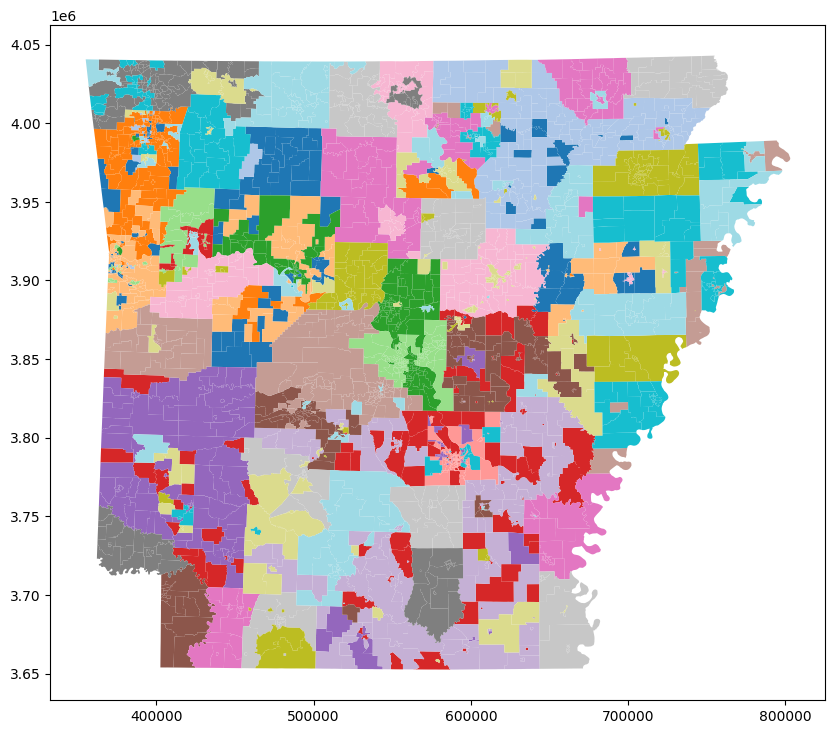

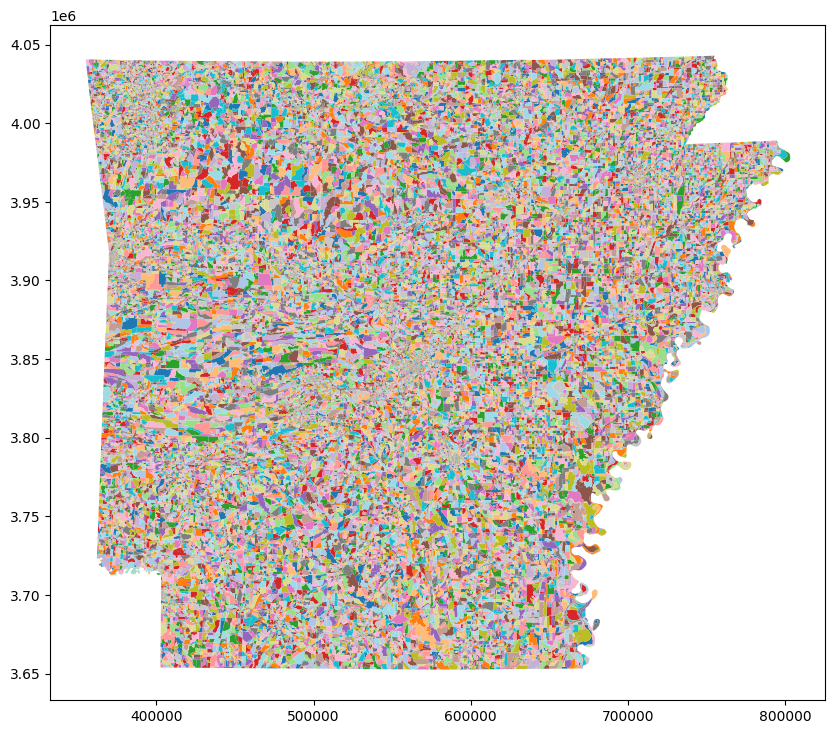

In [5]:
prefix_path = "./shapefiles/unprocessed/"

precincts = gpd.read_file(prefix_path + "ar_2016/ar_2016.shp")
blocks = gpd.read_file(prefix_path + "ar_pl2020_official/BLOCKS_TIGER_2020.shp")

# Precincts Map
precincts.plot(figsize=(10,10), cmap="tab20")
# Block Map
blocks.plot(figsize=(10,10), cmap="tab20")

In [6]:
print("Number of rows for blocks", len(blocks))
print("Block columns: ", blocks.columns)

print("Number of rows for precincts", len(precincts))
print("Block columns: ", precincts.columns)

Number of rows for blocks 136422
Block columns:  Index(['objectid', 'statefp20', 'countyfp20', 'tractce20', 'blockce20',
       'geoid20', 'name20', 'mtfcc20', 'ur20', 'uace20', 'uatype20',
       'funcstat20', 'aland20', 'awater20', 'intptlat20', 'intptlon20',
       'fileid', 'stusab', 'sumlev', 'geovar', 'geocomp', 'chariter', 'cifsn',
       'logrecno', 'region', 'division', 'state', 'statens', 'county',
       'countycc', 'countyns', 'cousub', 'cousubcc', 'cousubns', 'place',
       'placecc', 'placens', 'tract', 'blkgrp', 'block', 'cbsa', 'memi', 'csa',
       'cbsapci', 'nectapci', 'cd116', 'sldu18', 'sldl18', 'vtd', 'vtdi',
       'sduni', 'basename', 'funcstat', 'pop100', 'hu100', 'lsadc', 'partflag',
       'p0020001', 'p0020002', 'p0020003', 'p0020004', 'p0020005', 'p0020006',
       'p0020007', 'p0020008', 'p0020009', 'p0020010', 'p0020011', 'p0030001',
       'st_area(sh', 'st_length(', 'geometry'],
      dtype='object')
Number of rows for precincts 2525
Block columns:  In

In [9]:
ref = {
    "p0020001": "TOT_POP",
    "p0020002": "HSP_POP",
    "p0020005": "WHT_POP",
    "p0020006": "BLK_POP",
    "p0020008": "ASN_POP",
}

In [10]:
precincts["geometry"] = maup.make_valid(precincts)

In [11]:
blocks["geometry"] = maup.make_valid(blocks)

In [12]:
blocks.to_crs(precincts.crs, inplace=True)
assignment = maup.assign(blocks, precincts)

/Users/sherzodnimatullo/code/projects/416/gerrychain/env/lib/python3.10/site-packages/maup/indexed_geometries.py:16: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  geometry.index = i
/Users/sherzodnimatullo/code/projects/416/gerrychain/env/lib/python3.10/site-packages/maup/indexed_geometries.py:17: ShapelyDeprecationWarning: STRtree will be changed in 2.0.0 and will not be compatible with versions < 2.
  self.spatial_index = STRtree(self.geometries)
/Users/sherzodnimatullo/code/projects/416/gerrychain/env/lib/python3.10/site-packages/maup/indexed_geometries.py:17: ShapelyDeprecationWarning: STRtree will be changed in 2.0.0 and will not be compatible with versions < 2.
  self.spatial_index = STRtree(self.geometries)


In [14]:
precincts[list(ref.values())] = blocks[ref.keys()].groupby(assignment).sum()

<AxesSubplot: >

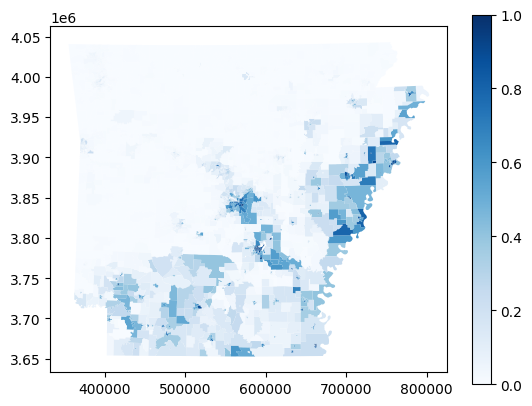

In [17]:
precincts.plot(column=precincts.BLK_POP.divide(precincts.TOT_POP), cmap="Blues", legend=True)

In [18]:
# Sanity Check
print("Total population of blocks", blocks["p0020001"].sum())
print("Total population of precincts", precincts['TOT_POP'].sum())

Total population of blocks 3011524.0
Total population of precincts 3011524.0


<AxesSubplot: >

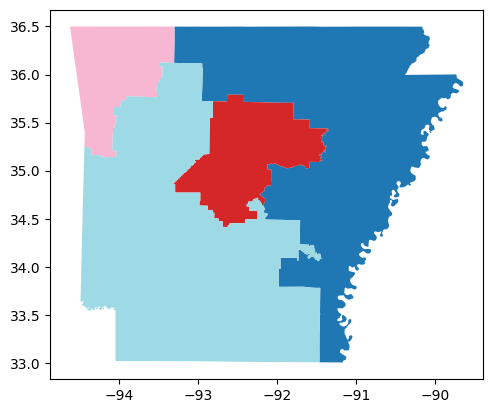

In [25]:
districts = gpd.read_file(prefix_path + "ar_cong_2021/ak_cong_2021.shp")
districts.plot(cmap="tab20")

In [27]:
districts.head()

,ID,DISTRICT,DISTRICTN,geometry
0,1,1,1,"POLYGON ((-91.84959 34.09321, -91.84596 34.093..."
1,2,2,2,"POLYGON ((-92.80842 34.57717, -92.80841 34.577..."
2,3,3,3,"POLYGON ((-94.13968 35.12895, -94.14129 35.128..."
3,4,4,4,"POLYGON ((-94.43980 35.16354, -94.43977 35.164..."


In [28]:
districts.to_crs(precincts.crs, inplace=True)
assignment = maup.assign(precincts, districts.set_index("DISTRICT"))

precincts["DISTRICT"] = assignment

/Users/sherzodnimatullo/code/projects/416/gerrychain/env/lib/python3.10/site-packages/maup/indexed_geometries.py:16: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  geometry.index = i
/Users/sherzodnimatullo/code/projects/416/gerrychain/env/lib/python3.10/site-packages/maup/indexed_geometries.py:17: ShapelyDeprecationWarning: STRtree will be changed in 2.0.0 and will not be compatible with versions < 2.
  self.spatial_index = STRtree(self.geometries)
/Users/sherzodnimatullo/code/projects/416/gerrychain/env/lib/python3.10/site-packages/maup/indexed_geometries.py:17: ShapelyDeprecationWarning: STRtree will be changed in 2.0.0 and will not be compatible with versions < 2.
  self.spatial_index = STRtree(self.geometries)


/Users/sherzodnimatullo/code/projects/416/gerrychain/env/lib/python3.10/site-packages/geopandas/plotting.py:807: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cat = pd.Categorical(values, categories=categories)


<AxesSubplot: >

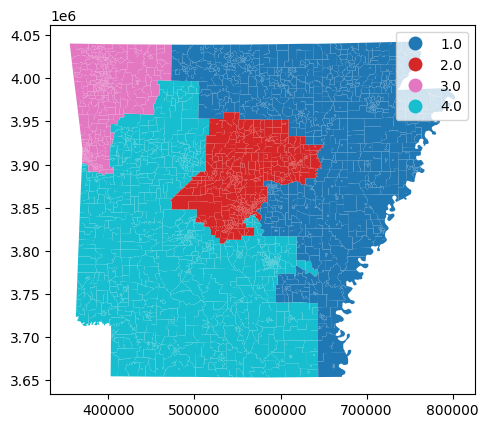

In [29]:
precincts.plot(column="DISTRICT", legend=True, cmap='tab10')

In [32]:
district_demographics = precincts.groupby("DISTRICT").sum()[["TOT_POP", "BLK_POP", "ASN_POP", "HSP_POP"]]
district_demographics.head()

precincts.to_file("./shapefiles/processed/arkansas/AR_VTDs.shp")

/var/folders/sc/7lv0tvq971z1q7mljvkw2ky80000gn/T/ipykernel_13077/2355445752.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  district_demographics = precincts.groupby("DISTRICT").sum()[["TOT_POP", "BLK_POP", "ASN_POP", "HSP_POP"]]
